In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales = pd.read_csv("C:\\Users\\DHRUBAJIT\\Desktop\\AnalyticsVidhya\\Big Mart Sales\\Big_Mart_Sales_train.csv")
sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
sales.shape

(8523, 12)

In [4]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Handling Missing Values

In [5]:
for i in sales.Item_Type.unique():
    group = sales[sales['Item_Type']==i]
    print(i)
    print('Minimum: %f' %group['Item_Weight'].min(), "  ", 'Maximum: %f' %group['Item_Weight'].max(), "  " ,'Average: %f' %group['Item_Weight'].mean())
    print("")

Dairy
Minimum: 4.805000    Maximum: 20.700000    Average: 13.426069

Soft Drinks
Minimum: 4.590000    Maximum: 20.750000    Average: 11.847460

Meat
Minimum: 5.150000    Maximum: 21.250000    Average: 12.817344

Fruits and Vegetables
Minimum: 5.460000    Maximum: 21.350000    Average: 13.224769

Household
Minimum: 5.030000    Maximum: 21.250000    Average: 13.384736

Baking Goods
Minimum: 4.880000    Maximum: 20.850000    Average: 12.277108

Snack Foods
Minimum: 5.095000    Maximum: 21.250000    Average: 12.987880

Frozen Foods
Minimum: 4.555000    Maximum: 20.850000    Average: 12.867061

Breakfast
Minimum: 6.425000    Maximum: 21.100000    Average: 12.768202

Health and Hygiene
Minimum: 5.175000    Maximum: 21.250000    Average: 13.142314

Hard Drinks
Minimum: 4.610000    Maximum: 19.700000    Average: 11.400328

Canned
Minimum: 4.615000    Maximum: 21.350000    Average: 12.305705

Breads
Minimum: 4.635000    Maximum: 20.850000    Average: 11.346936

Starchy Foods
Minimum: 6.695000  

In [6]:
for i in sales.Item_Type.unique():
    group1 = sales[sales['Item_Type'] == i]
    print(group1)
    ave = group1['Item_Weight'].mean()
    print(ave)
    group1['Item_Weight'] = group1['Item_Weight'].fillna(ave)
    print(group1['Item_Weight'])
   
    sales.loc[sales['Item_Weight'].isnull(),'Item_Weight'] = group1['Item_Weight']
    

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
0              FDA15        9.300          Low Fat         0.016047     Dairy   
11             FDA03       18.500          Regular         0.045464     Dairy   
19             FDU02       13.350          Low Fat         0.102492     Dairy   
28             FDE51        5.925          Regular         0.161467     Dairy   
30             FDV38       19.250          Low Fat         0.170349     Dairy   
40             FDU02       13.350          Low Fat         0.102512     Dairy   
45             FDM39        6.420               LF         0.089499     Dairy   
49             FDS02          NaN          Regular         0.255395     Dairy   
67             FDZ03       13.650          Regular         0.078946     Dairy   
91             DRG27        8.895          Low Fat         0.105274     Dairy   
110            FDD03       13.300          Low Fat         0.079806     Dairy   
127            FDV38       1

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
4              NCD19        8.930          Low Fat         0.000000   
22             NCB30       14.600          Low Fat         0.025698   
25             NCD06       13.000          Low Fat         0.099887   
54             NCP18       12.150          Low Fat         0.028760   
56             NCX54        9.195          Low Fat         0.048157   
74             NCZ18        7.825          low fat         0.186357   
83             NCL18          NaN          Low Fat         0.293418   
98             NCP18          NaN          Low Fat         0.028460   
120            NCF19       13.000          Low Fat         0.035307   
129            NCP30       20.500          Low Fat         0.032835   
131            NCH54       13.500          Low Fat         0.072669   
135            NCO26        7.235          Low Fat         0.076856   
140            NCC31        8.020          Low Fat         0.019867   
141   

In [7]:
for i in sales.Outlet_Type.unique():
    print(i)
    mode = sales['Outlet_Size'].mode()
    print(mode)

Supermarket Type1
0    Medium
dtype: object
Supermarket Type2
0    Medium
dtype: object
Grocery Store
0    Medium
dtype: object
Supermarket Type3
0    Medium
dtype: object


In [8]:
outlet_size_mode = sales['Outlet_Size'].mode()[0]
sales['Outlet_Size'] = sales['Outlet_Size'].fillna(outlet_size_mode)

In [9]:
sales.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Outliers, Feature Engineering and Transformation

#### Numeric Features

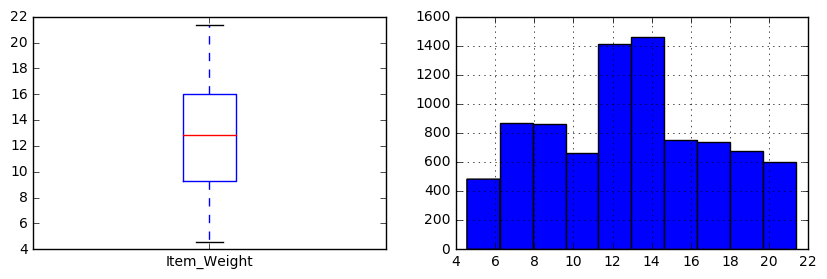

In [10]:
# Part 1 ---> Item_Weight
plt.figure(figsize=[10,3])
plt.subplot(121)
sales['Item_Weight'].plot(kind='box')

plt.subplot(122)
sales['Item_Weight'].hist()

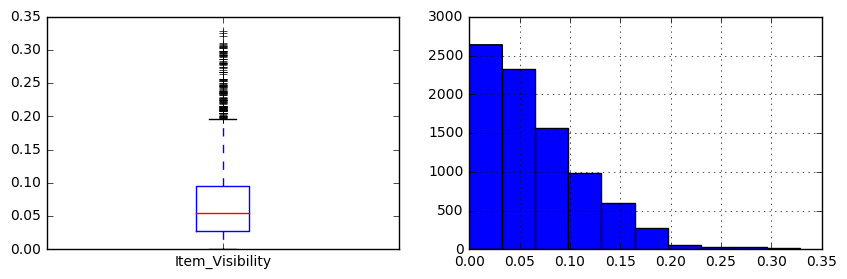

In [11]:
# Part 2--> Item_Visibility
plt.figure(figsize=[10,3])
plt.subplot(121)
sales['Item_Visibility'].plot(kind='box')

plt.subplot(122)
sales['Item_Visibility'].hist()

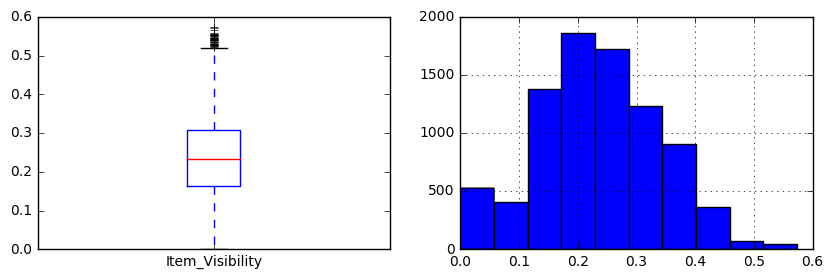

In [12]:
# This distribution is right skewed and there are some extreme outliers.
# Lets apply transformation and check whether that fixes the problem of outliers.
plt.figure(figsize=[10,3])
plt.subplot(121)
np.sqrt(sales['Item_Visibility']).plot(kind='box')

plt.subplot(122)
np.sqrt(sales['Item_Visibility']).hist()

In [13]:
# This distribution looks good. Lets apply this transformation.
sales['Item_Visibility'] = np.sqrt(sales['Item_Visibility'])

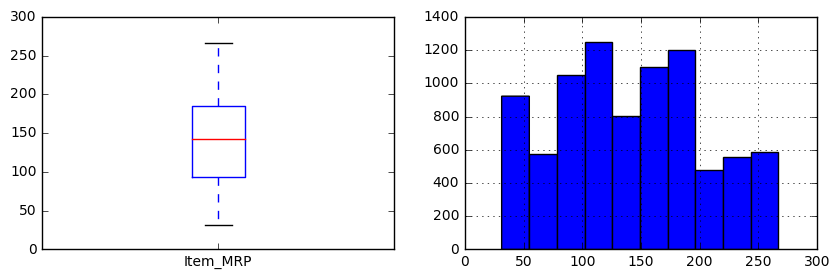

In [14]:
# Part 3 --> Item_MRP
plt.figure(figsize=[10,3])
plt.subplot(121)
sales['Item_MRP'].plot(kind='box')

plt.subplot(122)
sales['Item_MRP'].hist()

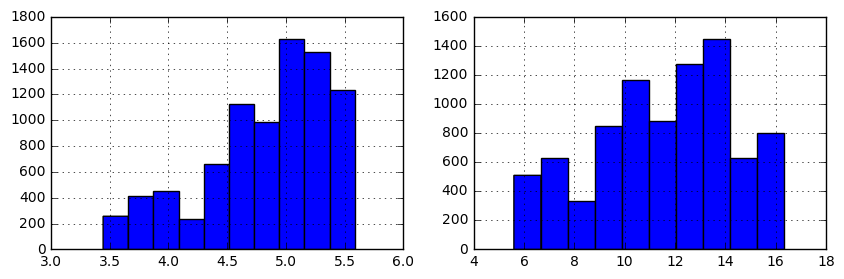

In [15]:
# Let's apply transformation and check if we can get a better distribution than this.
plt.figure(figsize=[10,3])
plt.subplot(121)
np.log(sales['Item_MRP']).hist()

plt.subplot(122)
np.sqrt(sales['Item_MRP']).hist()

In [16]:
# sqrt transformation looks good. Let's apply this.
sales['Item_MRP'] = np.sqrt(sales['Item_MRP'])

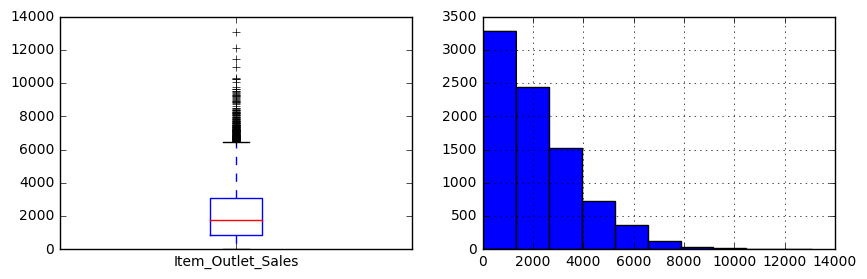

In [17]:
#Part 4 --> Item_Outlet_Sales
plt.figure(figsize=[10,3])
plt.subplot(121)
sales['Item_Outlet_Sales'].plot(kind='box')

plt.subplot(122)
sales['Item_Outlet_Sales'].hist()

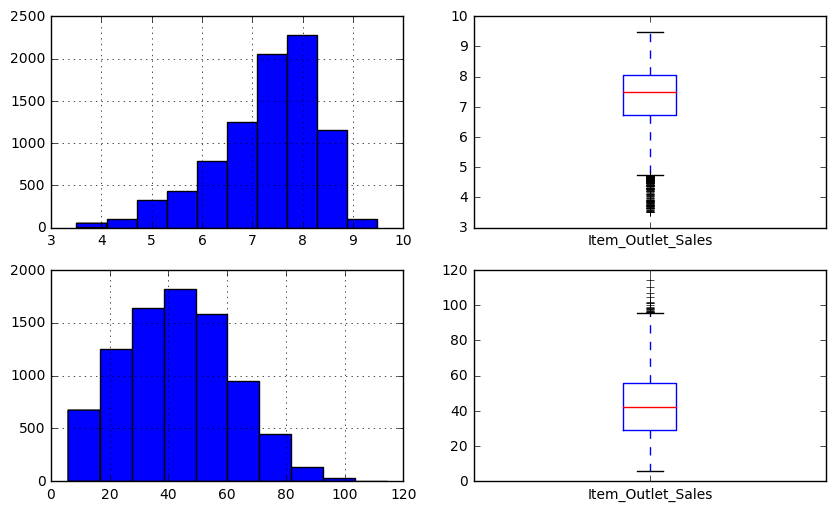

In [18]:
#Applying transformations
plt.figure(figsize=[10,6])
plt.subplot(221)
np.log(sales['Item_Outlet_Sales']).hist()

plt.subplot(222)
np.log(sales['Item_Outlet_Sales']).plot(kind='box')

plt.subplot(223)
np.sqrt(sales['Item_Outlet_Sales']).hist()

plt.subplot(224)
np.sqrt(sales['Item_Outlet_Sales']).plot(kind='box')

In [19]:
# sqrt transformation gives a pretty distribution.
sales['Item_Outlet_Sales'] = np.sqrt(sales['Item_Outlet_Sales'])

In [20]:
# Dividing the Item_Identifiers into 3 groups:
sales['Item_Identifier'].value_counts()
sales['Item_type_new'] = sales['Item_Identifier'].apply(lambda x: x[0:2])
sales['Item_type_new'] = sales['Item_type_new'].map({'FD': 'Food', 'NC':'Non-consumable','DR':'Drinks'})
sales['Item_type_new'].value_counts()

Food              6125
Non-consumable    1599
Drinks             799
Name: Item_type_new, dtype: int64

In [21]:
#Finding age of Outlet_Establishment_Year
sales['Outlet_Establishment_Year'] = 2017 - sales['Outlet_Establishment_Year']

#### Categorical Features

In [22]:
#Part 1 --> Item_Fat_Content
sales['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [23]:
sales = sales.replace({'Item_Fat_Content' : { 'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg' : 'Regular' }})

In [24]:
#Part 2--> Outlet_Size
sales['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [25]:
#Part 3--> Outlet_Location_Type
sales['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [26]:
#Part 5 --> Outlet_Type
sales['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
var_i = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_type_new']
for i in var_i:
    sales[i] = label.fit_transform(sales[i])

In [28]:
sales = pd.get_dummies(sales, columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_type_new'])
sales.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_type_new_0,Item_type_new_1,Item_type_new_2
0,FDA15,9.30,0.126678,Dairy,15.805354,OUT049,18,61.115775,1,0,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.138846,Soft Drinks,6.947604,OUT018,8,21.057607,0,1,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.129461,Meat,11.900336,OUT049,18,45.795961,1,0,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,13.494258,OUT010,19,27.062520,0,1,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.000000,Household,7.339033,OUT013,30,31.538947,1,0,...,0,0,1,0,1,0,0,0,0,1


In [29]:
sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Size_2',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_type_new_0', 'Item_type_new_1',
       'Item_type_new_2'],
      dtype='object')

In [30]:
X = sales.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales','Item_Type'], axis=1)
y = sales.Item_Outlet_Sales

In [31]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_type_new_0,Item_type_new_1,Item_type_new_2
0,9.30,0.126678,15.805354,18,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,5.92,0.138846,6.947604,8,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,17.50,0.129461,11.900336,18,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,19.20,0.000000,13.494258,19,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0
4,8.93,0.000000,7.339033,30,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1


#### Checking Correlation

In [32]:
X.corr()[(X.corr() > 0.7) & (X.corr() != 1)]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_type_new_0,Item_type_new_1,Item_type_new_2
Item_Weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Fat_Content_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Fat_Content_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Size_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Size_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Size_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y, random_state=0, test_size=0.3)

#### Checking whether the data is Linear OR Non-Linear:

#### Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
lr = LinearRegression()
lr.fit(xtrain,ytrain)
lr_pred = lr.predict(xtest)
print("Training Score:%f" %(lr.score(xtrain,ytrain)))
print("Test Score:%f" %(lr.score(xtest,ytest)))
print("Test RMSE:%f" %(np.sqrt(mean_squared_error(ytest,lr_pred))))

Training Score:0.663847
Test Score:0.657452
Test RMSE:10.946065


In [35]:
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, mean_squared_error
svr = SVR(kernel='rbf')
svr.fit(xtrain,ytrain)
svr_pred = svr.predict(xtest)
print("Training Score:%f" %(svr.score(xtrain,ytrain)))
print("Test Score:%f" %(svr.score(xtest,ytest)))
print("Test RMSE:%f" %(np.sqrt(mean_squared_error(ytest,svr_pred))))

Training Score:0.660677
Test Score:0.643730
Test RMSE:11.163164


In [36]:
#Exporting the New Dataset
new_sales_data = sales.drop(['Item_Identifier','Outlet_Identifier','Item_Type'], axis=1)

In [37]:
new_sales_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_type_new_0,Item_type_new_1,Item_type_new_2
0,9.30,0.126678,15.805354,18,61.115775,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,5.92,0.138846,6.947604,8,21.057607,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,17.50,0.129461,11.900336,18,45.795961,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,19.20,0.000000,13.494258,19,27.062520,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0
4,8.93,0.000000,7.339033,30,31.538947,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1


In [38]:
new_sales_data.to_csv('New_Dataset.csv', index=False)